# Q3.2: Fashion-MNIST CNN - Hyperparameter Tuning

Tune key hyperparameters (learning rate, batch size, epochs) and compare training/validation performance.

**Exam outputs:** comparison plots + best setting summary.

## Step 1: Import Libraries and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 60000
Test samples: 10000
Image shape: (28, 28, 1)


## Step 2: Define CNN Model Function

In [2]:
def build_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

print("CNN architecture defined")

CNN architecture defined


## Step 3: Experiment 1 - Learning Rate Comparison

In [3]:
learning_rates = [0.0001, 0.001, 0.01]
lr_histories = {}

for lr in learning_rates:
    print(f"\nTraining with lr={lr}...")

    model = build_cnn()
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train_cat,
                        batch_size=128,
                        epochs=10,
                        validation_split=0.2,
                        verbose=0)

    lr_histories[lr] = history

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Test Accuracy: {acc*100:.2f}%")

print("\nLearning rate comparison complete!")


Training with lr=0.0001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 86.35%

Training with lr=0.001...
Test Accuracy: 90.45%

Training with lr=0.01...
Test Accuracy: 87.67%

Learning rate comparison complete!


### Plot Learning Rate Comparison

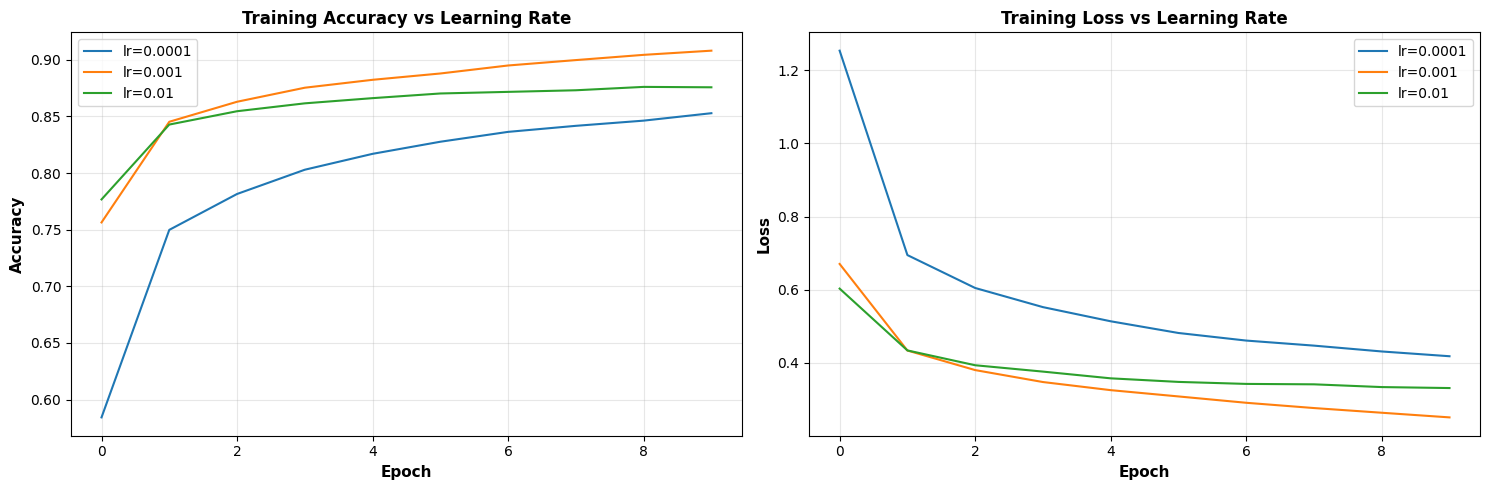

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for lr, history in lr_histories.items():
    ax1.plot(history.history['accuracy'], label=f'lr={lr}')
    ax2.plot(history.history['loss'], label=f'lr={lr}')

ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Training Accuracy vs Learning Rate', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Loss', fontsize=11, fontweight='bold')
ax2.set_title('Training Loss vs Learning Rate', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 4: Experiment 2 - Batch Size Comparison

In [5]:
batch_sizes = [32, 64, 128, 256]
batch_histories = {}

for bs in batch_sizes:
    print(f"\nTraining with batch_size={bs}...")

    model = build_cnn()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train_cat,
                        batch_size=bs,
                        epochs=10,
                        validation_split=0.2,
                        verbose=0)

    batch_histories[bs] = history

    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Test Accuracy: {acc*100:.2f}%")

print("\nBatch size comparison complete!")


Training with batch_size=32...
Test Accuracy: 90.64%

Training with batch_size=64...
Test Accuracy: 90.61%

Training with batch_size=128...
Test Accuracy: 90.22%

Training with batch_size=256...
Test Accuracy: 89.18%

Batch size comparison complete!


### Plot Batch Size Comparison

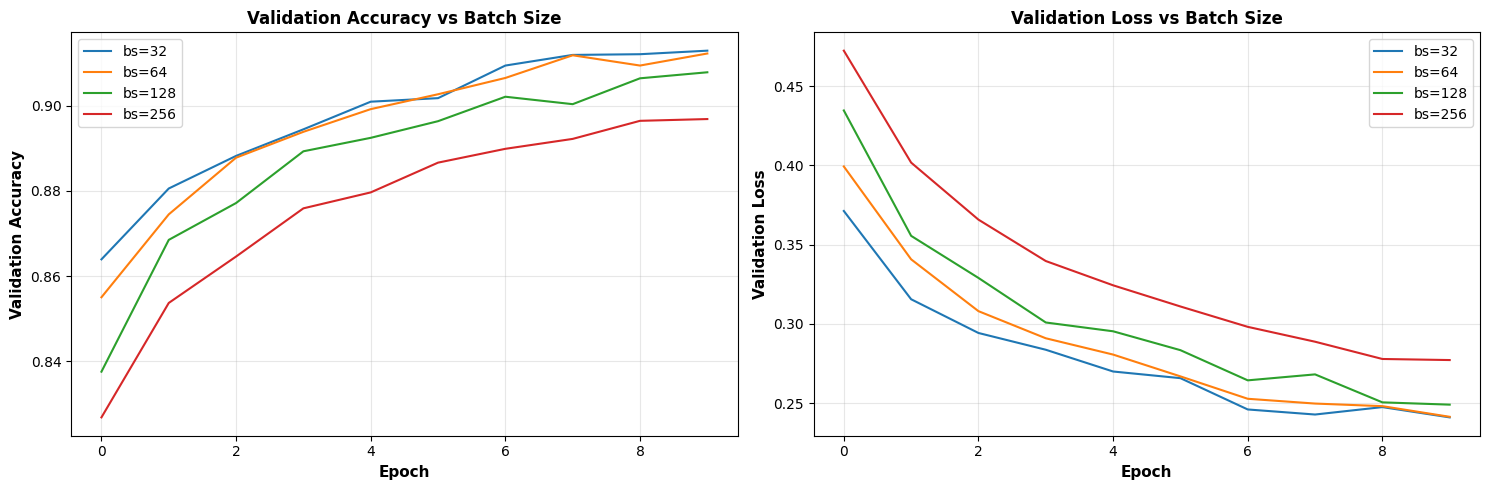

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for bs, history in batch_histories.items():
    ax1.plot(history.history['val_accuracy'], label=f'bs={bs}')
    ax2.plot(history.history['val_loss'], label=f'bs={bs}')

ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Validation Accuracy vs Batch Size', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Validation Loss', fontsize=11, fontweight='bold')
ax2.set_title('Validation Loss vs Batch Size', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Experiment 3 - Epochs Comparison (5 vs 10 vs 15)

In [7]:
epoch_configs = [5, 10, 15]
epoch_histories = {}

for ep in epoch_configs:
    print(f"\nTraining for {ep} epochs...")

    model = build_cnn()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train_cat,
                        batch_size=128,
                        epochs=ep,
                        validation_split=0.2,
                        verbose=0)

    epoch_histories[ep] = history

    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Test Accuracy: {acc*100:.2f}%")

print("\nEpochs comparison complete!")


Training for 5 epochs...
Test Accuracy: 88.77%

Training for 10 epochs...
Test Accuracy: 90.00%

Training for 15 epochs...
Test Accuracy: 91.02%

Epochs comparison complete!


### Plot Epochs Comparison

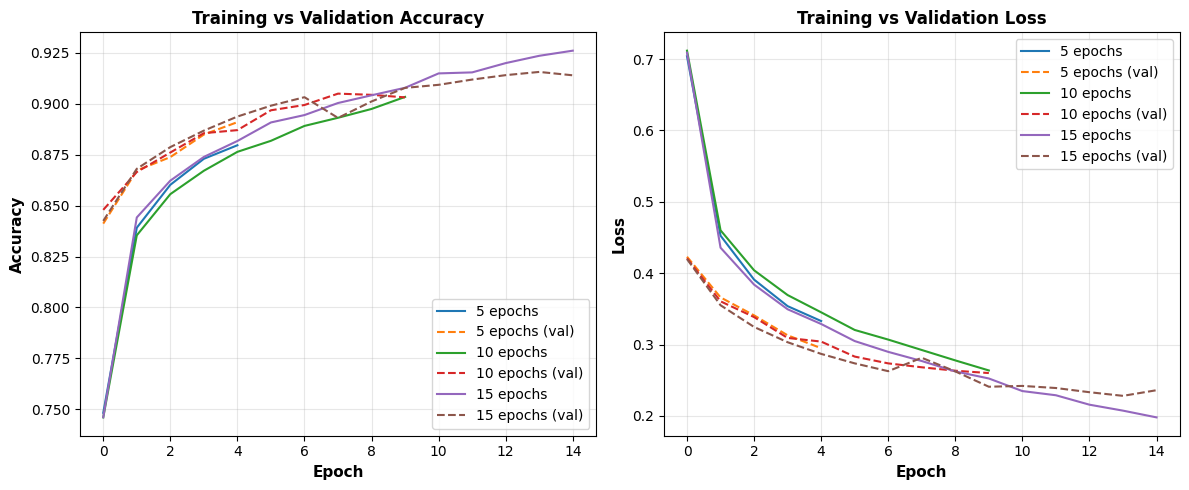

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for ep, history in epoch_histories.items():
    plt.plot(history.history['accuracy'], label=f'{ep} epochs')
    plt.plot(history.history['val_accuracy'], '--', label=f'{ep} epochs (val)')
plt.xlabel('Epoch', fontsize=11, fontweight='bold')
plt.ylabel('Accuracy', fontsize=11, fontweight='bold')
plt.title('Training vs Validation Accuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for ep, history in epoch_histories.items():
    plt.plot(history.history['loss'], label=f'{ep} epochs')
    plt.plot(history.history['val_loss'], '--', label=f'{ep} epochs (val)')
plt.xlabel('Epoch', fontsize=11, fontweight='bold')
plt.ylabel('Loss', fontsize=11, fontweight='bold')
plt.title('Training vs Validation Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Summary Table

In [9]:
import pandas as pd

# Collect final validation accuracies
lr_accs = {lr: hist.history['val_accuracy'][-1] for lr, hist in lr_histories.items()}
bs_accs = {bs: hist.history['val_accuracy'][-1] for bs, hist in batch_histories.items()}
ep_accs = {ep: hist.history['val_accuracy'][-1] for ep, hist in epoch_histories.items()}

print("\n=== HYPERPARAMETER TUNING RESULTS ===")
print("\nLearning Rates:")
for lr, acc in lr_accs.items():
    print(f"  lr={lr}: {acc*100:.2f}%")

print("\nBatch Sizes:")
for bs, acc in bs_accs.items():
    print(f"  bs={bs}: {acc*100:.2f}%")

print("\nEpochs:")
for ep, acc in ep_accs.items():
    print(f"  {ep} epochs: {acc*100:.2f}%")

print(f"\nBest LR: {max(lr_accs, key=lr_accs.get)}")
print(f"Best Batch Size: {max(bs_accs, key=bs_accs.get)}")
print(f"Best Epochs: {max(ep_accs, key=ep_accs.get)}")


=== HYPERPARAMETER TUNING RESULTS ===

Learning Rates:
  lr=0.0001: 86.86%
  lr=0.001: 90.86%
  lr=0.01: 88.15%

Batch Sizes:
  bs=32: 91.30%
  bs=64: 91.23%
  bs=128: 90.79%
  bs=256: 89.69%

Epochs:
  5 epochs: 89.10%
  10 epochs: 90.32%
  15 epochs: 91.40%

Best LR: 0.001
Best Batch Size: 32
Best Epochs: 15


## Summary

**Hyperparameters Tested:**
1. **Learning Rate**: 0.0001, 0.001, 0.01
   - Too small: slow convergence
   - Too large: unstable training
   - Optimal: typically 0.001 for Adam

2. **Batch Size**: 32, 64, 128, 256
   - Smaller: more noise, better generalization
   - Larger: faster training, more stable gradients
   - Trade-off: memory vs speed

3. **Epochs**: 5, 10, 15
   - More epochs: better fit, risk of overfitting
   - Early stopping recommended for production